<img src="images/usm.png" width="480" height="240" align="center"/>

<center>
    <strong> <font size="5"> MAT215 - 1° Semestre 2020 <br> Matemática Discreta</font> </strong>
    
</center>

**Profesor**: *Patricio Quiróz*

**Ayudante**: *Nicolás Alfaro*

# Laboratorio 2

## Desarrollo

In [11]:
import numpy as np
from numpy import genfromtxt

#Primera imagen
Matriz_saturno1 = genfromtxt('Saturno-1.csv', delimiter=',')
Matriz_saturno1 =(Matriz_saturno1 * 1).astype(np.uint8)

#Segunda imagen
Matriz_saturno2 = genfromtxt('Saturno-2.csv', delimiter=',')
Matriz_saturno2 =(Matriz_saturno2 * 1).astype(np.uint8)

#Tercera imagen
Matriz_saturno3 = genfromtxt('Saturno-3.csv', delimiter=',')
Matriz_saturno3 =(Matriz_saturno3 * 1).astype(np.uint8)

***a)*** Trabajaremos con los numeros binarios en strings, ya que si queremos comparar numeros como 9 = "00001001" y 1 = "00000001" en numeros binarios se complicara mucho en numeros enteros ya que 9 = 1001 y 1 = 1. Por otro lado, los numeros en base 10 si serán enteros.

In [12]:
def Binario(numero):
    string=["0","0","0","0","0","0","0", "0"]
    if numero >= 128:
        string[0] = "1"
        numero = numero - 128
    if numero >= 64:
        string[1] = "1"
        numero = numero - 64
    if numero >= 32:
        string[2] = "1"
        numero = numero - 32
    if numero >= 16:
        string[3] = "1"
        numero = numero - 16
    if numero >= 8:
        string[4] = "1"
        numero = numero - 8
    if numero >= 4:
        string[5] = "1"
        numero = numero - 4
    if numero >= 2:
        string[6] = "1"
        numero = numero - 2
    if numero == 1:
        string[7] = "1"
    string = "".join(string)
    return string

In [13]:
def BinarioInv(binario):
    number = 0
    binario = list(binario)
    largo = len(binario)
    for i in range(0,largo):
        if binario[i] == "1":
            number = number + 2**(largo-(1+i))
    return number

***b)***

In [14]:
def Matriz_Binaria(matriz):
    LISTA = []
    dimensiones = matriz.shape
    for i in range(0,dimensiones[0]):
        lista=[]
        for j in range(0,dimensiones[1]):
            lista.append(Binario(matriz[i][j]))
        LISTA.append(lista)
    LISTA = np.asarray(LISTA)
    return LISTA

In [15]:
def Matriz_BinariaInv(matriz):
    LISTA = []
    dimensiones = matriz.shape
    for i in range(0,dimensiones[0]):
        lista=[]
        for j in range(0,dimensiones[1]):
            lista.append(BinarioInv(matriz[i][j]))
        LISTA.append(lista)
    LISTA = np.asarray(LISTA)
    return LISTA

***c)***

In [16]:
def Corrector_Binario(binario1,binario2,binario3):
    Lb1 = list(binario1)
    Lb2 = list(binario2)
    Lb3 = list(binario3)
    Len = len(Lb1)
    final = ""
    for i in  range(0,Len):
        if Lb1[i] == Lb2[i]:
            final = final + Lb1[i]
        elif Lb1[i] == Lb3[i]:
            final = final + Lb1[i]
        elif Lb2[i] == Lb3[i]:
            final = final + Lb2[i]
    return final

Notar que esta función corrige de posición en posición. Como en el enunciado se dijo que al menos habrían 2 mensajes iguales, basta con esta función. Por otro lado, si consideramos tres numeros binarios distintos, entregará la combinación de los 3 con el caracter mas repetido en la posicion i.

In [17]:
def Matriz_Correctora_Binaria(Matriz1,Matriz2,Matriz3):
    dim = Matriz1.shape
    MatrizF = []
    for i in range(0,dim[0]):
        VectorFila = []
        for j in range(0,dim[1]):
            VectorFila.append(Corrector_Binario(Matriz1[i][j],Matriz2[i][j],Matriz3[i][j]))
        MatrizF.append(VectorFila)
    MatrizF = np.asarray(MatrizF)
    return MatrizF

***d)***

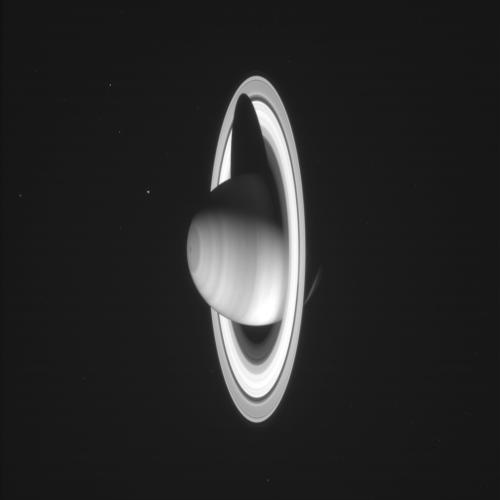

In [23]:
from PIL import Image

MS1Bin= Matriz_Binaria(Matriz_saturno1)
MS2Bin= Matriz_Binaria(Matriz_saturno2)
MS3Bin= Matriz_Binaria(Matriz_saturno3)
MatrizFinal = Matriz_Correctora_Binaria(MS1Bin,MS2Bin,MS3Bin)
MatrizFinal = Matriz_BinariaInv(MatrizFinal)
MatrizFinal = (MatrizFinal * 1).astype(np.uint8)
display(Image.fromarray(MatrizFinal))

Podemos ver claramente a saturno y 3 cuerpos celestes más a su izquierda, pero si nos acercamos mas podemos ver 2 más, uno en medio de 2 que se ven bien y una cerca del anillo por la parte superior izquierda. Finalmente se puede ver un cuerpo más por la parte inferior, bajo el anillo, llegando al borde de la imagen.

***e)*** Se utilizo Golay, ya que como este puede corregir cualquier error de 3 bits y detectar cualquier error de 7 bits, puede ser bastante rapido. Y es un buen codigo corrector. Por otro lado, el de repetición puede ser más lento y además no es tan buen corrector, ya que puede presentar errores como los mencionados al comienzo, es decir, se debe tener la condición de minimalidad de error, lo que no necesariamente es lo que siempre ocurre.